# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [3]:
import pandas as pd
import numpy as np
!pip install plotly
import plotly.express as px
!pip install statsmodels
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 25.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 21.6 MB/s eta 0:00:00


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [6]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.head(10)

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

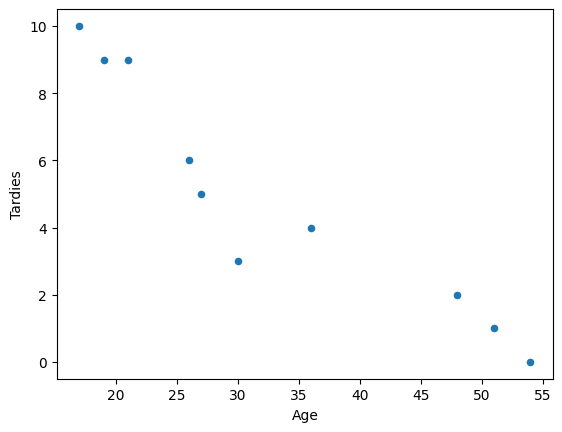

In [11]:
student_data.plot.scatter(x = 'Age', y = 'Tardies')
plt.show

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

The number of tardies decreases as the student age increases.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
covariance_matrix = student_data.cov()
print("Covariance matrix:")
print(covariance_matrix)


# Covariance shows how the two variables vary together, and the direction of the relationship.
# This shows considerable diversity in student ages, and some spread in tardiness, although less pronounced than the spread of ages.
# The negative covariance between age and tardies suggests an inverse relationship.

Covariance matrix:
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


In [19]:
correlation_matrix = student_data.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Correlation shows the direction and the strength of the relationship between the two variables.
# The magnitude of the correlation between age and tardies is 0.939163, close to 1. This indicates a strong correlation. The value is -0.939163.
# The negative sign indicates an inverse correlation.

Correlation matrix:
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [42]:
# "Using train_test_split() from the data science library scikit-learn, you can split your dataset into subsets that minimize the potential for bias in your evaluation and validation process."

# Split the data into independent X and Y variables

x = student_data[['Age']] # Independent variable. Needs to be a 2D array. "The double square brackets [['Age']] ensure that X is a DataFrame with one column, not a Series. "
y = student_data['Tardies'] # Dependent variable


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Set the random seed. This insures reproducibility
seed = 42

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

# Build the linear regression model

model = LinearRegression()
model.fit(x_train, y_train)

# Predict the dependent variable 'y' based on the independent variable 'x' using the test data (x_test)
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 1.073148141082379
R^2 Score: -3.2925925643295164


Plot your regression model on your scatter plot.

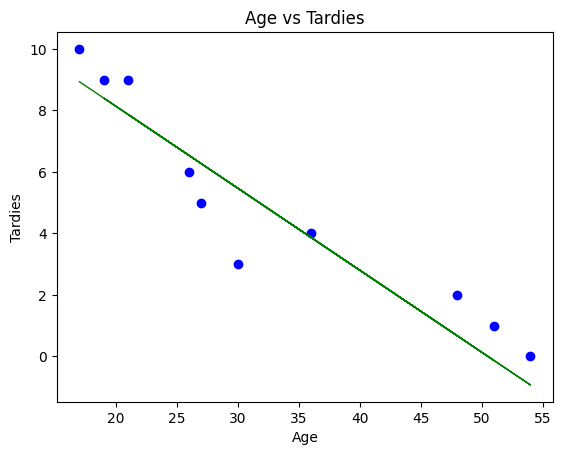

In [47]:
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='green', linewidth=2)
plt.title('Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

The results of the model show appear to show a strong inverse correlation between age and tardies. However, more data is required to draw condfident conclusions, as we currently only have 10 data points. Other factors not considered in this model may also have an affect on tardiness.

Mean Squared Error: 1.073148141082379

R^2 Score: -3.2925925643295164

The MSE indicates the average squared difference between predicted tardiness and actual tardiness. This value suggests that the model's predictions are fairly close to the actual values.

However, The negative R squared score of -3.29 suggests that the model performs poorly and does not fit the data well. This requires further investigation.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [50]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("/Users/kurtiswalton/Ironhack/lab-regression-analysis-en/vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [56]:
# Select columns for analysis
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

# Create new dataframe with select columns

selected_data = vehicles[variables]

# Calculate correlation matrix

correlation_matrix = selected_data.corr()

print("Correlation Matrix:")
print(f"{correlation_matrix}")

# As expected, Fuel Barrels/Year has the highest positive correlation with CO2 Emission Grams/Mile, followed by Fuel Cost/Year. 
# Year has the lowest/weakest correlation with CO2 Emissions and therefore provides the least helpful information.

Correlation Matrix:
                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emissi

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [85]:
# Split into predictor variables (X) and outcome variable (y)
x = selected_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = selected_data['CO2 Emission Grams/Mile']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()

# Fit the model using the training sets
model.fit(x_train, y_train)

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Here we are using multiple linear regression.


Coefficients: [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Intercept: 755.6935073143886


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [84]:
# Coefficients: 
# Year: -0.31558675 
# Cylinders: 1.79402632 
# Fuel Barrels/Year: 19.23102729 
# Combined MPG: -2.9335732  
# Fuel Cost/Year  0.03197145


# The coefficients provide insights into how each predictor variable affects the target variable (CO2 Emission Grams/Mile).
# For example, the coefficient value for Fuel Barrels/Year indicates that for every aditional barrel of fuel consumed each year, CO2 emissions increase by approximately 19.23 grams per mile.
# Other coefficient values suggest lesser effects on the target variable, for example an estimated increase in CO2 emissions of 0.03 grams per mile for every dollar increase in fuel per year.
# The Year coefficient suggests an inverse effect on the target variable, with a decrease of 0.3 in CO2 emissions for every increase in the year of the vehicle.
# I am more confident in the coefficients with a greater magnitude such as Fuel Barrels/Year and Combined MPG 


# The intercept represents the estimated CO2 emissions when all predictor variables are zero. 
# However, some of these variables (such as Year and Cylinders) cannot be zero, so the intercept is more of a theoretical value.


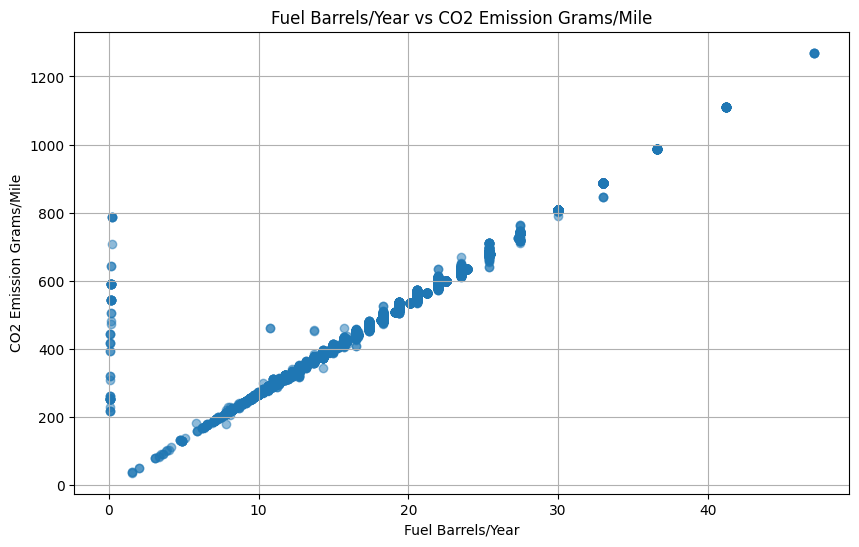

In [86]:
# Scatter plot to show correlation between CO2 Emissions and Fuel Barrels/Year
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['Fuel Barrels/Year'], selected_data['CO2 Emission Grams/Mile'], alpha=0.5)
plt.title('Fuel Barrels/Year vs CO2 Emission Grams/Mile')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.grid(True)
plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*